In [1]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6.4*4,4.8*1.5)

import numpy as np
from scipy import special

In [22]:
def random_phase_multisine(F, N, P=1, gain=1, fs=1, process=None):
    '''
        N: number of "time samples" in one signal period

        P: number of time domain periods to generate

        With a normalized amplitude spectrum, the DFT coefficient magnitudes U(k*fs/N) are scaled by 1/sqrt(N)
        U(k*fs/N) are uniformley bounded with a finite number of discontinuities on [0, fs/2].
        Further, the clock frequency fs is independent of N.

        Phase mean drawn from the random process must = 0
    '''

    # spectral resolution = 2*pi / N

    # F is the number of unique spectral lines between [0, fs/2)
    if process is None:
        process = np.random.default_rng(seed=101)

    # results in N2 number of "real" spectral lines, but we later set dc component to 0
    F = N // 2 - 1
    # sample positive frequencies up to fn, skipping dc
    k = process.integers(low=1, high=F, size=F)

    # signal is real, so its spectrum is hermitian
    # negative frequencies are conjugate symmetric
    # magnitude is even while the phase is odd
    spectrum = np.exp(1j * k * (2 * np.pi / F))
    nspectrum = np.conj(np.flip(spectrum))
    # create oscillator bank with dc value U[1] = 0
    #U = np.concatenate(([0], positive_spectrum[:-1], np.zeros(positive_spectrum.size * 16), negative_spectrum, [0]))
    U = np.concatenate((spectrum, np.zeros(spectrum.size*4)))
    #Ur = np.array([1] + list(positive_spectrum))
    #Ur = np.fft.fftshift(Ur)
    #ur = np.fft.irfft(Ur, norm="ortho")

    # extract the continuous time domain signal corresponding to the constructed fourier series (hermitian spectrum)
    # norm of "ortho" applies a 1/sqrt(N) scaling, as desired

    u = np.fft.ifft(U, norm="ortho")
    return u, U

75
75
phase[dc]=0.0
phase[fs/2]=0.0


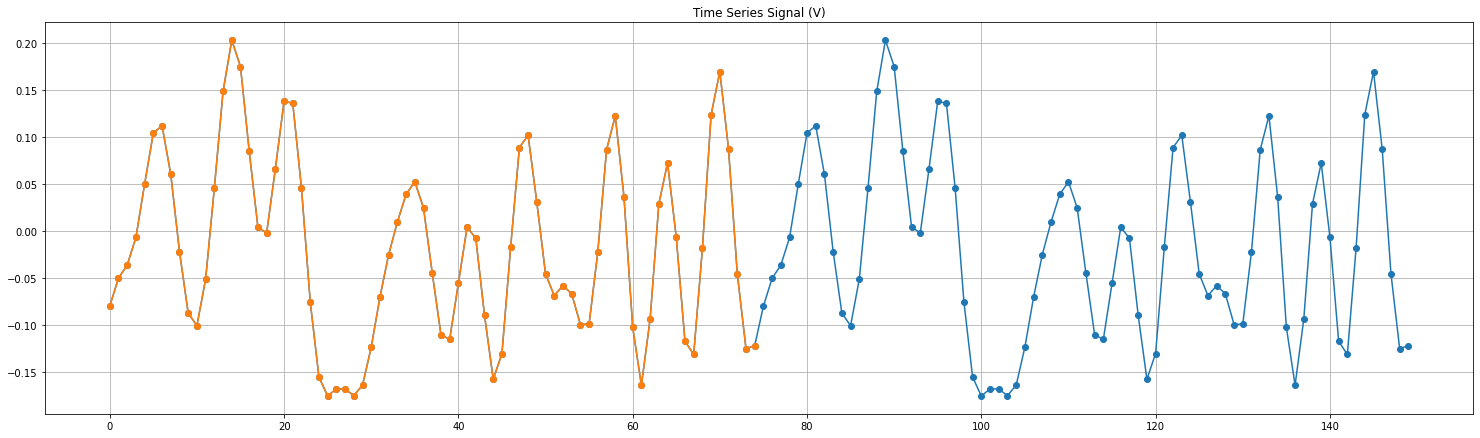

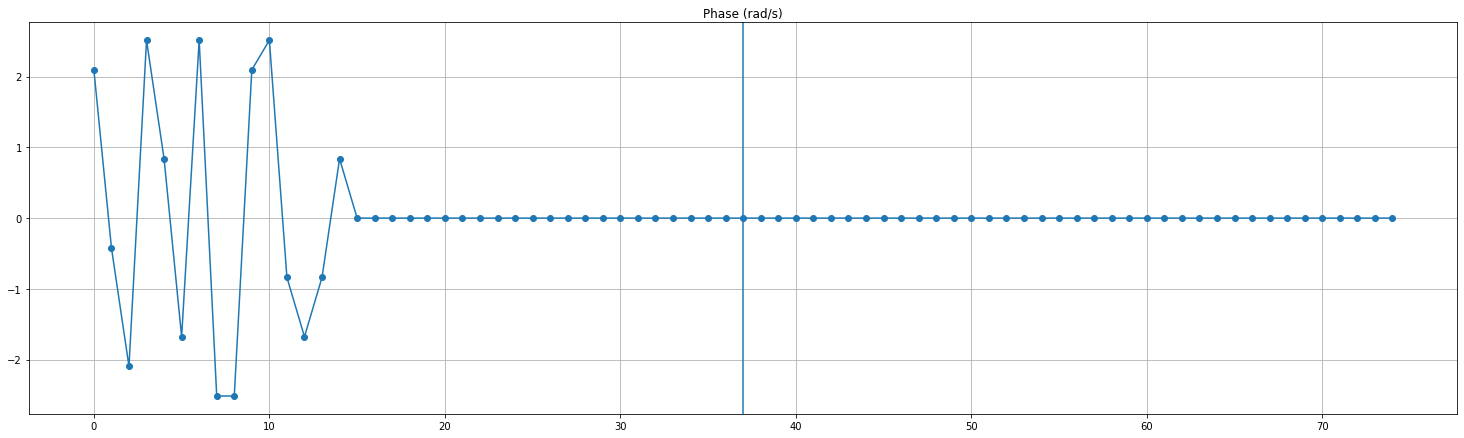

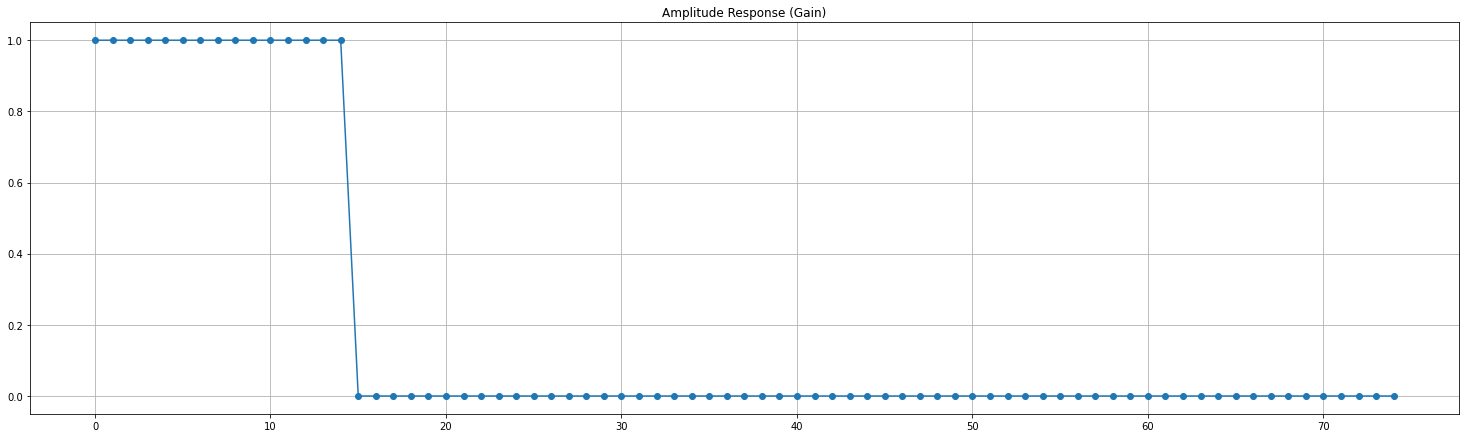

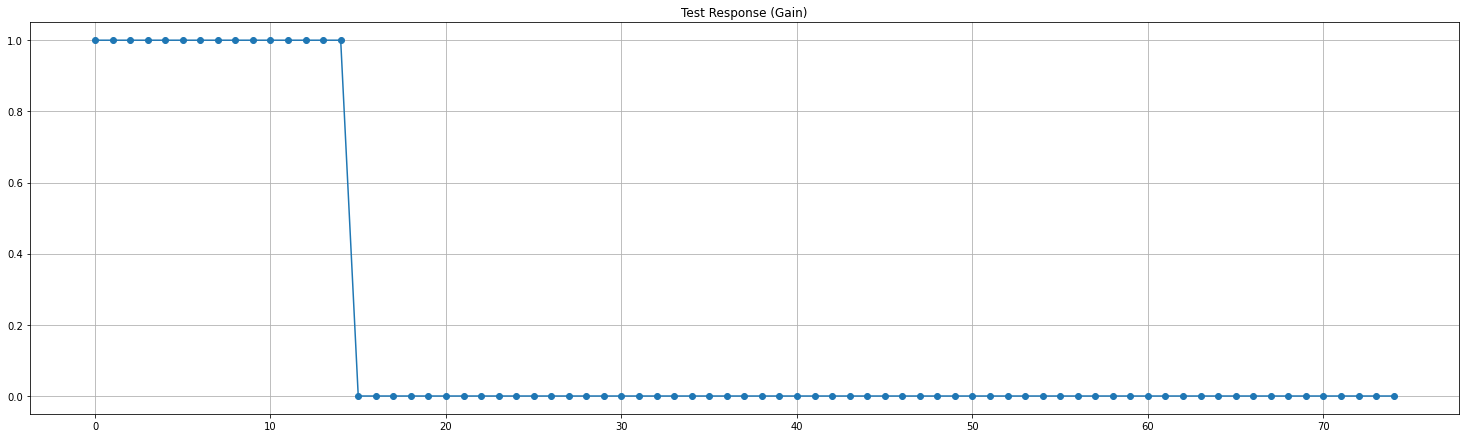

In [23]:
N = 33
u, U = random_phase_multisine(F = 2, N=N)
# the exact coordinate transformation is 2 * np.real(u)
# here we normalize to 1 instead of 2*pi
ureal = np.real(u) / np.pi
(print(len(U)))
print(len(u))

plt.figure()
plt.grid()
plt.title('Time Series Signal (V)')
plt.plot(np.concatenate((ureal, ureal)), marker='o')
plt.plot(ureal, marker='o')

plt.figure()
plt.grid()
plt.title('Phase (rad/s)')
checkfft = np.fft.fft(u, norm="ortho")
phase = np.angle(U)#np.angle(checkfft)
print(f'phase[dc]={phase[len(phase)//2]}')
print(f'phase[fs/2]={phase[-1]}')
plt.plot(phase, marker='o')
plt.axvline(x=len(phase) // 2)

plt.figure()
plt.grid()
plt.title('Amplitude Response (Gain)')
plt.plot(np.abs(U), marker='o')

plt.figure()
plt.grid()
plt.title('Test Response (Gain)')
plt.plot(np.abs(checkfft), marker='o')

#plt.figure()
#plt.grid()
#plt.title('Magnitude Response (dB)')
#mag = 20 * np.log10(np.nan_to_num(np.abs(U)))
#plt.bar(np.arange(len(mag)), mag)
